### Real Estate Price Prediction

### ABOUT

#### Using the Ames,Iowa Housing Price Dataset from the Kaggle
https://www.kaggle.com/c/house-prices-advanced-regression-techniques#description

#### INTRODUCTION
The Ames Housing Dataset  is a data set describing the sale of individual residential property in Ames, Iowa
from 2006 to 2010. The data set contains 2930 observations and a large number of explanatory
variables (23 nominal, 23 ordinal, 14 discrete, and 20 continuous) involved in assessing home
values.(Cock, 2011)

In general the 20 continuous variables relate to various area dimensions for each observation. In
addition to the typical lot size and total dwelling square footage found on most common home
listings, other more specific variables are quantified in the data set. Area measurements on the
basement, main living area, and even porches are broken down into individual categories based
on quality and type. The large number of continuous variables in this data set should give
students many opportunities to differentiate themselves as they consider various methods of
using and combining the variables.(Cock, 2011)

The 14 discrete variables typically quantify the number of items occurring within the house.
Most are specifically focused on the number of kitchens, bedrooms, and bathrooms (full and
half) located in the basement and above grade (ground) living areas of the home. Additionally,
the garage capacity and construction/remodeling dates are also recorded.(Cock, 2011)

There are a large number of categorical variables (23 nominal, 23 ordinal) associated with this
data set. They range from 2 to 28 classes with the smallest being STREET (gravel or paved) and
the largest being NEIGHBORHOOD (areas within the Ames city limits). The nominal variables
typically identify various types of dwellings, garages, materials, and environmental conditions
while the ordinal variables typically rate various items within the property. The coding within the
original data typically utilized an eight-character name that was relevant to the classification but
some of the original class levels were difficult to interpret.(Cock, 2011)

References
Cock, D. D. (2011). Ames, Iowa: Alternative to the Boston Housing Data as an. Journal of Statistics Education, 19(3). doi:https://doi.org/10.1080/10691898.2011.11889627

#### DATA COLLECTION AND CLEANING
The data for the analysis is gathered from House Prices: Advanced Regression Techniques Kernel in Kaggle. The kernel has two data sets in csv format. ‘train.csv’ contains the trainig datset and ‘test.csv’ contains the testing dataset.

The data set was already provided in a split form, hence splitting was not required. From the 80 columns in the dataset, following features are chosen: MSZoning, LotArea, OverallQual, OverallCond, YearBuilt, TotalBsmtSF, FirstFlrSF, SecondFlrSF, GrLivArea, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, GarageCars, GarageArea, SalePrice. From the 'MSZoning' variables only 'RH', 'RM', 'RP', 'RL' have been selected.
1. RH ->	Residential High Density
2. RL ->	Residential Low Density
3. RP ->	Residential Low Density Park 
4. RM ->	Residential Medium Density




#### ANALYSIS
The analysis of house prices was carried out in Python. For the analysis of the data set we have used various packages of Python library. We have used ‘numpy’, ‘pandas’ & ‘dfply’ package for data munging and data wrangling, ‘matplotlib’ & ’seaborn’ to create visualizations & graphs from the curated data and ‘sklearn’,’statsmodels.api’ & ‘scipy’ to run predictive analytics.

#### EXPLORATORY DATA ANALYSIS
The process of analyzing data sets, summarizing their main statistical characteristics and presenting them visually is known as Exploratory Data Analysis. EDA might contain a statistical model, but its primary purpose is to uncover trends and patterns. I have carried out an Exploratory Data Analysis for this dataset. The correlation between the various housing parameters and their impact on the house sale price are discussed below.

The results of the Exploratory Data Analysis are as per below.

### INSTALLING ESSENTIAL LIBRARIES

In [24]:
! pip install dfply

# Useful Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
from dfply import *
import matplotlib.pyplot as plt

import sklearn
from sklearn import ensemble
from sklearn import datasets
from sklearn import model_selection
from sklearn.linear_model import LinearRegression as lm
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Ignore Warnings
warnings.filterwarnings('ignore')

# Graph Inline
output_notebook()
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


Loading BokehJS ...

### IMPORTING & CLEANING DATA SETS

In [25]:
# Reading Data
df_train = pd.read_csv('train.csv') #importing the housing price training dataset
df_test = pd.read_csv('test.csv') #importing the housing price testing dataset


In [26]:
#training dataset statistical description
print('\nHousing Dataset Information :\n')
df_train.info()

print('\nHousing Dataset Describe :\n')
df_train.describe()

print('\nHousing Dataset Sample :')
df_train.sample(4)

# Renaming Columns
df_train.rename(columns={'1stFlrSF': 'FirstFlrSF'}, inplace = True)
df_train.rename(columns={'2ndFlrSF': 'SecondFlrSF'}, inplace = True)

df_test.rename(columns={'1stFlrSF': 'FirstFlrSF'}, inplace = True)
df_test.rename(columns={'2ndFlrSF': 'SecondFlrSF'}, inplace = True)




Housing Dataset Information :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null ob

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000



Housing Dataset Sample :


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
624,625,60,RL,80.0,10400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,165150
1296,1297,20,RL,80.0,8700,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,12,2008,WD,Normal,155000
1347,1348,20,RL,93.0,15306,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,5,2007,New,Partial,283463
530,531,80,RL,85.0,10200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,WD,Abnorml,175000


In [27]:
# Selecting Columns 
df_train = (
            df_train >> 
            select(X.MSZoning, X.LotArea, X.OverallQual, X.OverallCond, X.YearBuilt, 
                   X.TotalBsmtSF, X.FirstFlrSF, X.SecondFlrSF, X.GrLivArea, X.FullBath, 
                   X.HalfBath, X.BedroomAbvGr, X.KitchenAbvGr, X.TotRmsAbvGrd, X.GarageCars, 
                   X.GarageArea, X.SalePrice )
)

df_test = (
            df_test >> 
            select(X.MSZoning, X.LotArea, X.OverallQual, X.OverallCond, X.YearBuilt, 
                   X.TotalBsmtSF, X.FirstFlrSF, X.SecondFlrSF, X.GrLivArea, X.FullBath, 
                   X.HalfBath, X.BedroomAbvGr, X.KitchenAbvGr, X.TotRmsAbvGrd, X.GarageCars, 
                   X.GarageArea, X.SalePrice )
)

# Filtering only Residential Property 
residential_codes = ["RH","RL","RP","RM"]
df_train = df_train[df_train.MSZoning.isin(residential_codes)]
df_test = df_test[df_test.MSZoning.isin(residential_codes)]

print('\nHousing Dataset Information - Train :\n')
df_train.info()

print('\nHousing Dataset Describe - Train :\n')
df_train.describe()

print('\nHousing Dataset Sample - Train :')
df_train.sample(4)

# RH	Residential High Density
# RL	Residential Low Density
# RP	Residential Low Density Park 
# RM	Residential Medium Density


Housing Dataset Information - Train :

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1385 entries, 0 to 1459
Data columns (total 17 columns):
MSZoning        1385 non-null object
LotArea         1385 non-null int64
OverallQual     1385 non-null int64
OverallCond     1385 non-null int64
YearBuilt       1385 non-null int64
TotalBsmtSF     1385 non-null int64
FirstFlrSF      1385 non-null int64
SecondFlrSF     1385 non-null int64
GrLivArea       1385 non-null int64
FullBath        1385 non-null int64
HalfBath        1385 non-null int64
BedroomAbvGr    1385 non-null int64
KitchenAbvGr    1385 non-null int64
TotRmsAbvGrd    1385 non-null int64
GarageCars      1385 non-null int64
GarageArea      1385 non-null int64
SalePrice       1385 non-null int64
dtypes: int64(16), object(1)
memory usage: 194.8+ KB

Housing Dataset Describe - Train :



,LotArea,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,FirstFlrSF,SecondFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
count,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000
mean,10706.158845,6.063538,5.607942,1970.048375,1062.618773,1172.896751,336.516968,1515.031047,1.548736,0.368953,2.882310,1.048375,6.537906,1.753791,467.954513,180136.283032
std,10185.732173,1.373366,1.125799,29.831024,443.785047,387.466021,436.241125,532.739682,0.551509,0.500336,0.820535,0.224508,1.624029,0.755061,213.762881,79906.363281
min,1300.000000,1.000000,1.000000,1872.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,37900.000000
25%,7711.000000,5.000000,5.000000,1953.000000,800.000000,892.000000,0.000000,1120.000000,1.000000,0.000000,2.000000,1.000000,5.000000,1.000000,312.000000,129000.000000
50%,9591.000000,6.000000,5.000000,1971.000000,994.000000,1095.000000,0.000000,1459.000000,2.000000,0.000000,3.000000,1.000000,6.000000,2.000000,472.000000,160000.000000
75%,11751.000000,7.000000,6.000000,1999.000000,1306.000000,1412.000000,720.000000,1784.000000,2.000000,1.000000,3.000000,1.000000,7.000000,2.000000,576.000000,212900.000000
max,215245.000000,10.000000,9.000000,2010.000000,6110.000000,4692.000000,2065.000000,5642.000000,3.000000,2.000000,8.000000,3.000000,14.000000,4.000000,1418.000000,755000.000000



Housing Dataset Sample - Train :


,MSZoning,LotArea,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,FirstFlrSF,SecondFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
1280,RL,9808,7,5,2002,1573,1573,0,1573,2,0,3,1,6,2,544,227000
870,RL,6600,5,5,1962,894,894,0,894,1,0,2,1,5,1,308,109500
775,RM,4500,6,5,1998,1204,1204,0,1204,2,0,2,1,5,2,412,162000
793,RL,9158,8,5,2007,1496,1496,0,1496,2,0,3,1,7,2,474,225000


In [28]:
#testing dataset statistical description
print('\nHousing Dataset Information - Test :\n')
df_test.info()

print('\nHousing Dataset Describe - Test :\n')
df_test.describe()

print('\nHousing Dataset Sample - Test :')
df_test.sample(4)


Housing Dataset Information - Test :

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1366 entries, 0 to 1458
Data columns (total 17 columns):
MSZoning        1366 non-null object
LotArea         1366 non-null int64
OverallQual     1366 non-null int64
OverallCond     1366 non-null int64
YearBuilt       1366 non-null int64
TotalBsmtSF     1365 non-null float64
FirstFlrSF      1366 non-null int64
SecondFlrSF     1366 non-null int64
GrLivArea       1366 non-null int64
FullBath        1366 non-null int64
HalfBath        1366 non-null int64
BedroomAbvGr    1366 non-null int64
KitchenAbvGr    1366 non-null int64
TotRmsAbvGrd    1366 non-null int64
GarageCars      1365 non-null float64
GarageArea      1365 non-null float64
SalePrice       1366 non-null float64
dtypes: float64(4), int64(12), object(1)
memory usage: 192.1+ KB

Housing Dataset Describe - Test :



,LotArea,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,FirstFlrSF,SecondFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
count,1366.000000,1366.00000,1366.000000,1366.000000,1365.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1365.000000,1365.000000,1366.000000
mean,9963.471449,6.04612,5.592972,1970.314056,1048.808791,1160.616398,321.183016,1485.525622,1.555637,0.368960,2.878477,1.043924,6.415813,1.761905,471.138462,179795.559365
std,4782.337655,1.40175,1.113912,29.765928,442.377522,400.139167,419.680985,490.077918,0.558170,0.502043,0.832414,0.212028,1.508418,0.778947,217.023396,16183.250034
min,1470.000000,2.00000,1.000000,1879.000000,0.000000,407.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,135751.318900
25%,7515.000000,5.00000,5.000000,1953.000000,794.000000,878.000000,0.000000,1112.000000,1.000000,0.000000,2.000000,1.000000,5.000000,1.000000,315.000000,169636.239075
50%,9588.000000,6.00000,5.000000,1971.000000,988.000000,1082.000000,0.000000,1429.000000,2.000000,0.000000,3.000000,1.000000,6.000000,2.000000,473.000000,179722.914350
75%,11645.000000,7.00000,6.000000,1999.000000,1298.000000,1382.000000,671.000000,1724.750000,2.000000,1.000000,3.000000,1.000000,7.000000,2.000000,576.000000,187565.054250
max,51974.000000,10.00000,9.000000,2010.000000,5095.000000,5095.000000,1862.000000,5095.000000,4.000000,2.000000,6.000000,2.000000,15.000000,5.000000,1488.000000,281643.976100



Housing Dataset Sample - Test :


,MSZoning,LotArea,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,FirstFlrSF,SecondFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
621,RL,8513,5,5,1961,1800.0,1800,0,1800,2,0,6,2,10,0.0,0.0,223581.7582
579,RL,24572,9,3,1977,994.0,1599,1345,2944,2,2,3,1,9,3.0,864.0,209834.3831
474,RL,8139,6,5,1995,680.0,680,790,1470,2,1,3,1,7,2.0,420.0,181913.1791
130,RL,6410,4,5,1958,960.0,960,0,960,1,0,3,1,5,0.0,0.0,171190.6241


In [29]:
#Counting the Null Value in the datasets
print('\nNull Value Count - Train  :\n')
print(df_train.isnull().sum())

print('\nNull Value Count - Test  :\n')
print(df_test.isnull().sum())

# Dropping rows with NA values
df_test = df_test.dropna()

print('\nHousing Dataset Information (after removing Null Values) - Test :\n')
df_test.info()


Null Value Count - Train  :

MSZoning        0
LotArea         0
OverallQual     0
OverallCond     0
YearBuilt       0
TotalBsmtSF     0
FirstFlrSF      0
SecondFlrSF     0
GrLivArea       0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
TotRmsAbvGrd    0
GarageCars      0
GarageArea      0
SalePrice       0
dtype: int64

Null Value Count - Test  :

MSZoning        0
LotArea         0
OverallQual     0
OverallCond     0
YearBuilt       0
TotalBsmtSF     1
FirstFlrSF      0
SecondFlrSF     0
GrLivArea       0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
TotRmsAbvGrd    0
GarageCars      1
GarageArea      1
SalePrice       0
dtype: int64

Housing Dataset Information (after removing Null Values) - Test :

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1364 entries, 0 to 1458
Data columns (total 17 columns):
MSZoning        1364 non-null object
LotArea         1364 non-null int64
OverallQual     1364 non-null int64
OverallCond     136

### EXPLORATORY DATA ANALYSIS

In [30]:
print('\nSale Price Summary :')
#descriptive statistics summary
df_train['SalePrice'].describe()


Sale Price Summary :


count      1385.000000
mean     180136.283032
std       79906.363281
min       37900.000000
25%      129000.000000
50%      160000.000000
75%      212900.000000
max      755000.000000
Name: SalePrice, dtype: float64

#### HISTOGRAM


Sales Price Histogram


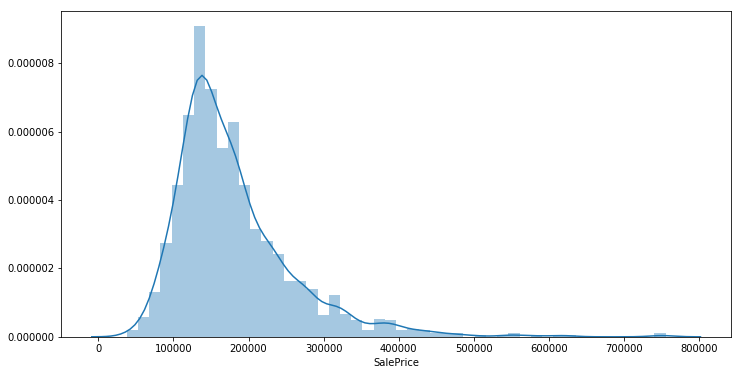

In [31]:
#Generating Histogram for Target Variable - 'SalePrice'
print('\nSales Price Histogram')
dist_sale_price = sns.distplot(df_train['SalePrice']);
dist_sale_price.figure.set_size_inches(12,6)

#### SCATTER PLOT


Scatter Plot - Above Ground Living Area Vs Sale Price


Text(0.5,0.98,'Above Ground Living Area (sq. ft) Vs Sale Price')

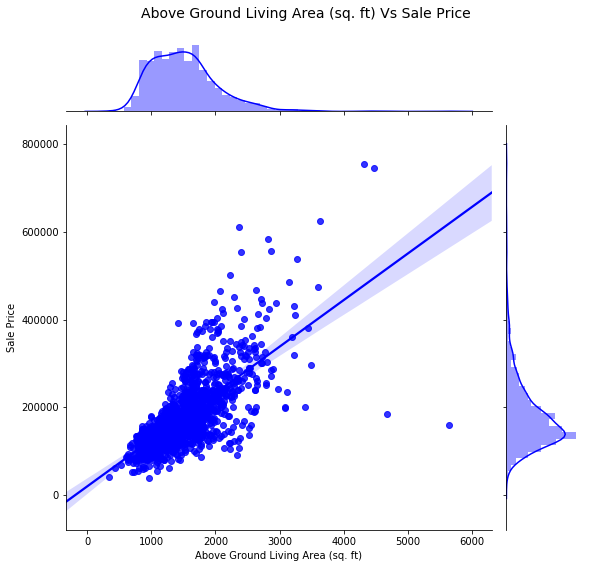

In [32]:
#Generating Scatterplot between Target Variable - 'SalePrice' and 'Above Ground Living Area'
print('\nScatter Plot - Above Ground Living Area Vs Sale Price')
data_sel = df_train >> select(X.GrLivArea, X.SalePrice)

jointplot = sns.jointplot(data=data_sel, x="GrLivArea", y="SalePrice", kind="reg", color="b", size=8)
jointplot.set_axis_labels("Above Ground Living Area (sq. ft)", "Sale Price")
jointplot.fig.subplots_adjust(top=.92)
jointplot.fig.suptitle('Above Ground Living Area (sq. ft) Vs Sale Price', fontsize=14)


Scatter Plot - Basement Area (sq. ft) Vs Sale Price


Text(0.5,0.98,'Basement Area (sq. ft) Vs Sale Price')

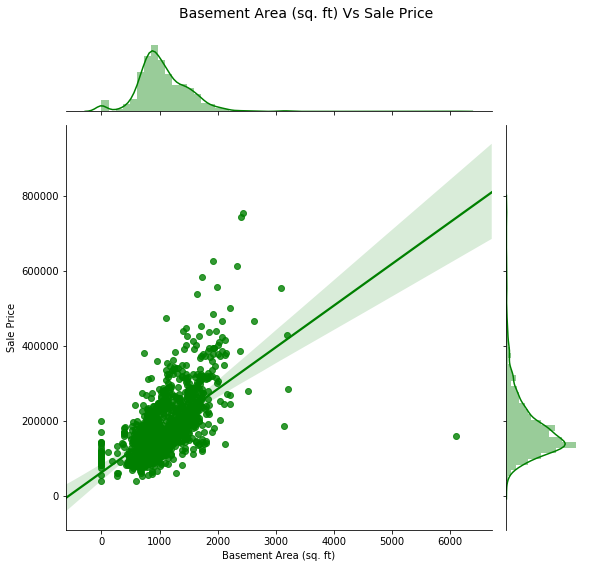

In [33]:
#Generating Scatterplot between Target Variable - 'SalePrice' and 'Basement Area'
print('\nScatter Plot - Basement Area (sq. ft) Vs Sale Price')

data_sel = df_train >> select(X.TotalBsmtSF, X.SalePrice)

jointplot = sns.jointplot(data=data_sel, x="TotalBsmtSF", y="SalePrice", size=8, kind="reg", color="g")
jointplot.set_axis_labels("Basement Area (sq. ft)", "Sale Price")
jointplot.fig.subplots_adjust(top=.92)
jointplot.fig.suptitle('Basement Area (sq. ft) Vs Sale Price', fontsize=14)

#### SWARM PLOT


Swarm Plot - Sale Price Vs Overall Quality


(-0.5, 9.5, 0, 800000)

Text(0.5,1,'Sale Price Vs Overall Quality')

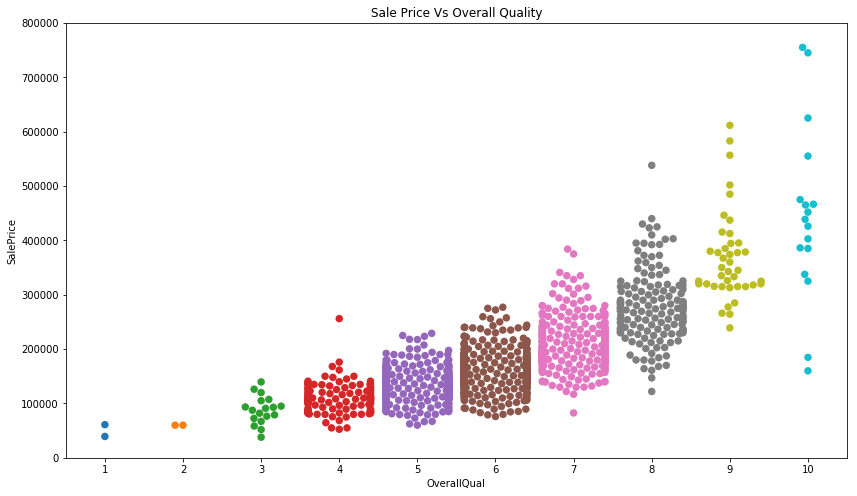

In [34]:
#Generating Swarm Plot between Target Variable - 'SalePrice' and 'Overall Quality'
print('\nSwarm Plot - Sale Price Vs Overall Quality')
data_sel = df_train >> select(X.OverallQual, X.SalePrice)

f, ax = plt.subplots(figsize=(14, 8))
swarm_plot = sns.swarmplot(data=data_sel, x="OverallQual", y="SalePrice", size=7.5)
swarm_plot.axis(ymin=0, ymax=800000)
plt.title('Sale Price Vs Overall Quality')

#### CORRELATION MATRIX


Correlation Matrix - Housing Parameters




,LotArea,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,FirstFlrSF,SecondFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
LotArea,1.000000,0.120835,-0.015650,0.033334,0.257793,0.293619,0.062001,0.264957,0.142429,0.030358,0.110938,-0.020990,0.181886,0.162480,0.186935,0.270955
OverallQual,0.120835,1.000000,-0.091828,0.554148,0.552897,0.500025,0.289150,0.599130,0.537752,0.260284,0.103459,-0.185731,0.441441,0.598301,0.566143,0.790986
OverallCond,-0.015650,-0.091828,1.000000,-0.378201,-0.184201,-0.166988,0.038103,-0.085756,-0.194384,-0.052155,-0.003055,-0.096431,-0.071892,-0.185889,-0.149081,-0.081196
YearBuilt,0.033334,0.554148,-0.378201,1.000000,0.414054,0.314648,-0.016655,0.198680,0.446789,0.218536,-0.063941,-0.167680,0.110723,0.533769,0.477560,0.517466
TotalBsmtSF,0.257793,0.552897,-0.184201,0.414054,1.000000,0.815424,-0.161439,0.457988,0.336031,-0.029024,0.043373,-0.074126,0.281882,0.444493,0.504658,0.617536
FirstFlrSF,0.293619,0.500025,-0.166988,0.314648,0.815424,1.000000,-0.182487,0.577038,0.408582,-0.093167,0.117926,0.063774,0.409860,0.458155,0.518417,0.617059
SecondFlrSF,0.062001,0.289150,0.038103,-0.016655,-0.161439,-0.182487,1.000000,0.692851,0.414193,0.602830,0.512848,0.061531,0.632157,0.175959,0.124895,0.318834
GrLivArea,0.264957,0.599130,-0.085756,0.198680,0.457988,0.577038,0.692851,1.000000,0.637033,0.423680,0.516698,0.097606,0.828973,0.470024,0.474592,0.708499
FullBath,0.142429,0.537752,-0.194384,0.446789,0.336031,0.408582,0.414193,0.637033,1.000000,0.119391,0.374329,0.141422,0.580179,0.465219,0.403729,0.557077
HalfBath,0.030358,0.260284,-0.052155,0.218536,-0.029024,-0.093167,0.602830,0.423680,0.119391,1.000000,0.243121,-0.062522,0.364695,0.210026,0.151836,0.283088


[Text(79.8,0.5,'Housing Parameters'), Text(0.5,60,'Housing Parameters')]

Text(0.5,1,'Housing Parameters Correlation Matrix')

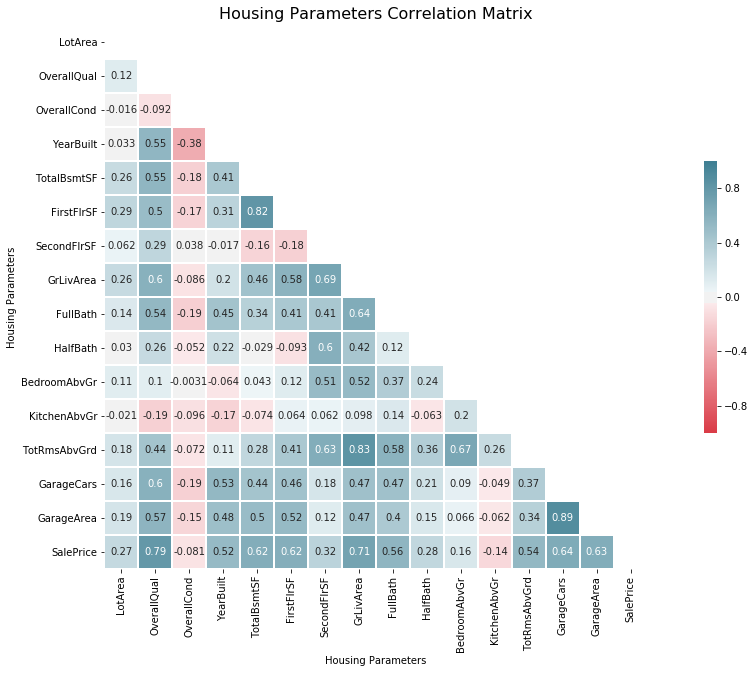

In [35]:
#Generating Correlation Matrix between Target Variable - 'SalePrice' and other Housing  Dataset Features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Fetch Data
data_sel = df_train >> drop(X.MSZoning)

# Compute the correlation matrix

print('\nCorrelation Matrix - Housing Parameters')
print('\n')

corr = data_sel.corr()
corr

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 220, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
heatmap = sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

heatmap.figure.set_size_inches(16,8)
heatmap.set(xlabel = "Housing Parameters", ylabel = "Housing Parameters")
heatmap.set_title('Housing Parameters Correlation Matrix', fontsize=16)
heatmap.figure.set_size_inches(20,10)

#### HEAT MAP

'OverallQual'

,lot_area,total_bsmt_sf,first_flr_sf,second_flr_sf,gr_liv_area,full_bath,half_bath,bedroom_abv_gr,kitchen_abv_gr,tot_rms_abv_grd,garage_cars,garage_area,sale_price
OverallQual,,,,,,,,,,,,,
5,0.220613,0.322531,0.277345,0.223832,0.259033,0.392496,0.297203,0.948232,0.327273,0.477390,0.473974,0.434798,0.211032
1,0.019038,0.031832,0.000000,0.000000,0.000000,0.000000,0.653846,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.042396,0.114937,0.207200,0.196350,0.200770,0.449735,0.072650,0.750000,1.000000,0.454733,0.404762,0.323565,0.095507
6,0.223165,0.350472,0.296098,0.453616,0.346546,0.544886,0.554779,0.958678,0.079339,0.530762,0.583010,0.485120,0.280285
9,0.492715,0.719320,0.700236,0.438414,0.604330,0.822687,0.606004,0.865854,0.000000,0.844625,0.981583,0.868485,0.803588
8,0.313500,0.575935,0.545352,0.578045,0.550214,0.784670,0.645243,0.970395,0.000000,0.697978,0.858217,0.768664,0.573500
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.269841,0.000000,0.000000,0.000000,0.078704,0.173469,0.139372,0.024874
7,0.336950,0.422556,0.375732,0.631871,0.455509,0.744686,0.670019,0.992933,0.050883,0.636860,0.717170,0.601528,0.401458
4,0.126918,0.236968,0.203219,0.190271,0.199256,0.371943,0.153153,0.770270,0.454054,0.389973,0.406325,0.363309,0.151425


[Text(33,0.5,'Overall Quality'), Text(0.5,19.7984,'Housing Parmeters')]

Text(0.5,1,'Housing Quality Comparison with Housing Parameters')

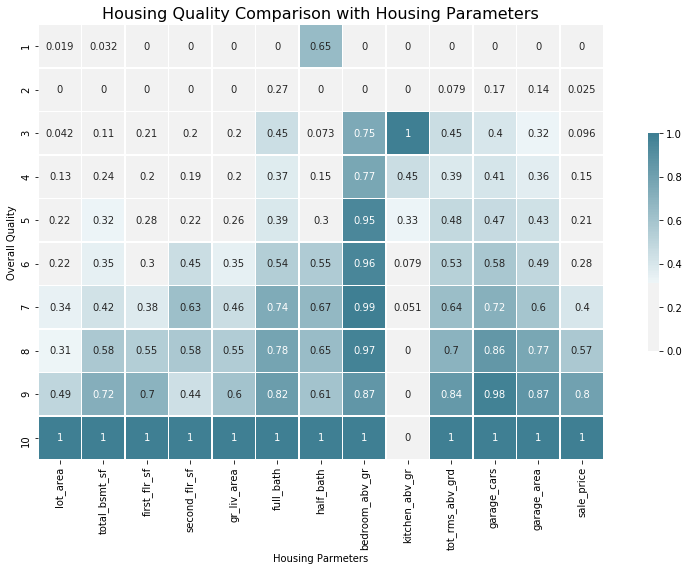

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#overall_qual = X.OverallQual.mean, overall_cond = X.OverallCond,

# Fetching Runs Across Teams Per Over
df_sel = (
        df_train 
        >> group_by(X.OverallQual) 
        >> summarize(lot_area = X.LotArea.mean(), 
                              total_bsmt_sf = X.TotalBsmtSF.mean(), first_flr_sf = X.FirstFlrSF.mean(), 
                              second_flr_sf = X.SecondFlrSF.mean(), gr_liv_area = X.GrLivArea.mean(), 
                              full_bath = X.FullBath.mean(), half_bath = X.HalfBath.mean(), 
                              bedroom_abv_gr = X.BedroomAbvGr.mean(), kitchen_abv_gr = X.KitchenAbvGr.mean(), 
                              tot_rms_abv_grd = X.TotRmsAbvGrd.mean(), garage_cars = X.GarageCars.mean(), 
                              garage_area = X.GarageArea.mean(), sale_price = X.SalePrice.mean()) 
)



# Rescale The Data
def scaleColumns(df, cols_to_scale):
    for col in cols_to_scale:
        df[col] = pd.DataFrame(scaler.fit_transform(pd.DataFrame(df[col])),columns=[col])
    return df

columns = df_sel.columns.values.tolist()
columns.pop(0)

data = scaleColumns(df_sel,columns)

# Assigning Index
df_sel = df_sel.set_index('OverallQual')

# Printing Table
df_sel.sample(10)

#cmap = sns.diverging_palette(220, 10, as_cmap=True)
cmap = sns.diverging_palette(50, 220, sep=80, n=10, as_cmap=True)

# Draw the heatmap 
heatmap = sns.heatmap(df_sel, cmap=cmap, vmin=0, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
heatmap.figure.set_size_inches(16,8)
heatmap.set(xlabel = "Housing Parmeters", ylabel = "Overall Quality")
heatmap.set_title('Housing Quality Comparison with Housing Parameters', fontsize=16)

'MSZoning'

,lot_area,total_bsmt_sf,first_flr_sf,second_flr_sf,gr_liv_area,full_bath,half_bath,bedroom_abv_gr,kitchen_abv_gr,tot_rms_abv_grd,garage_cars,garage_area,sale_price
MSZoning,,,,,,,,,,,,,
RM,0.000000,0.000000,0.000000,0.488838,0.00000,0.000000,0.524819,0.000000,0.200185,0.000000,0.347303,0.169806,0.000000
RH,0.192658,0.092217,0.331483,1.000000,0.81914,0.686933,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.081028
RL,1.000000,1.000000,1.000000,0.000000,1.00000,1.000000,1.000000,0.404926,0.000000,0.693498,1.000000,1.000000,1.000000


[Text(33,0.5,'Housing Zones'), Text(0.5,91.9091,'Housing Parmeters')]

Text(0.5,1,'Housing Zones Comparison with Housing Parameters')

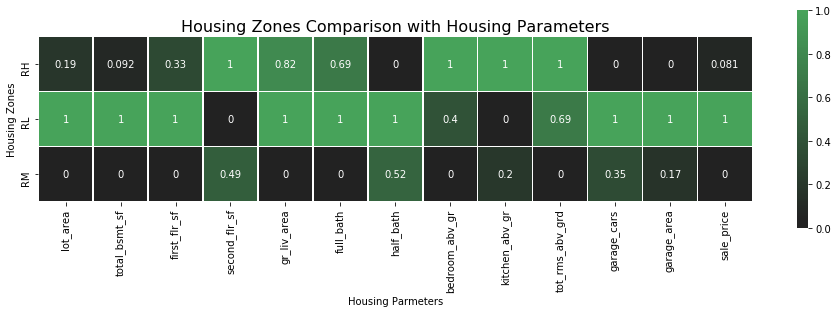

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#overall_qual = X.OverallQual.mean, overall_cond = X.OverallCond,

# Fetching Runs Across Teams Per Over
df_sel = (
        df_train 
        >> group_by(X.MSZoning) 
        >> summarize(lot_area = X.LotArea.mean(), 
                              total_bsmt_sf = X.TotalBsmtSF.mean(), first_flr_sf = X.FirstFlrSF.mean(), 
                              second_flr_sf = X.SecondFlrSF.mean(), gr_liv_area = X.GrLivArea.mean(), 
                              full_bath = X.FullBath.mean(), half_bath = X.HalfBath.mean(), 
                              bedroom_abv_gr = X.BedroomAbvGr.mean(), kitchen_abv_gr = X.KitchenAbvGr.mean(), 
                              tot_rms_abv_grd = X.TotRmsAbvGrd.mean(), garage_cars = X.GarageCars.mean(), 
                              garage_area = X.GarageArea.mean(), sale_price = X.SalePrice.mean()) 
)

# Rescale The Data
def scaleColumns(df, cols_to_scale):
    for col in cols_to_scale:
        df[col] = pd.DataFrame(scaler.fit_transform(pd.DataFrame(df[col])),columns=[col])
    return df

columns = df_sel.columns.values.tolist()
columns.pop(0)

data = scaleColumns(df_sel,columns)

# Assigning Index
df_sel = df_sel.set_index('MSZoning')

cmap = sns.diverging_palette(255, 133, l=60, n=10, center="dark", as_cmap=True)

# Printing Table
df_sel.sample(3)

# Draw the heatmap 
heatmap = sns.heatmap(df_sel, cmap=cmap, vmin=0, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
heatmap.figure.set_size_inches(16,8)
heatmap.set(xlabel = "Housing Parmeters", ylabel = "Housing Zones")
heatmap.set_title('Housing Zones Comparison with Housing Parameters', fontsize=16)

#### CREATE DUMMY VARIABLES

In [38]:
# Creating new categorical Variable For MSZoning
df_train = pd.get_dummies(df_train, columns=["MSZoning"])
df_test = pd.get_dummies(df_test, columns=["MSZoning"])

# Dropping Columns which dont add value to the model
df_train.drop('MSZoning', axis=1, inplace=True, errors ='ignore')
df_test.drop('MSZoning', axis=1, inplace=True, errors ='ignore')

In [39]:
# Printing Table
df_train.sample(6)
print('\n')
print('Housing Train Dataset with new dummy variables: \n')
df_train.info()

,LotArea,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,FirstFlrSF,SecondFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,8450,7,5,2003,856,856,854,1710,2,1,3,1,8,2,548,208500,0,1,0
1331,10780,5,5,1976,911,954,0,954,1,0,3,1,6,2,576,132500,0,1,0
1285,6000,6,6,1939,780,825,587,1412,1,0,4,1,6,1,280,132500,0,0,1
314,9600,7,7,1925,728,832,809,1641,1,1,3,1,6,2,546,178000,0,0,1
216,8450,7,5,2004,1436,1436,0,1436,2,0,3,1,8,2,484,210000,0,1,0
1377,10998,5,5,1941,984,984,620,1604,2,0,3,1,6,2,660,117000,0,1,0




Housing Train Dataset with new dummy variables: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1385 entries, 0 to 1459
Data columns (total 19 columns):
LotArea         1385 non-null int64
OverallQual     1385 non-null int64
OverallCond     1385 non-null int64
YearBuilt       1385 non-null int64
TotalBsmtSF     1385 non-null int64
FirstFlrSF      1385 non-null int64
SecondFlrSF     1385 non-null int64
GrLivArea       1385 non-null int64
FullBath        1385 non-null int64
HalfBath        1385 non-null int64
BedroomAbvGr    1385 non-null int64
KitchenAbvGr    1385 non-null int64
TotRmsAbvGrd    1385 non-null int64
GarageCars      1385 non-null int64
GarageArea      1385 non-null int64
SalePrice       1385 non-null int64
MSZoning_RH     1385 non-null uint8
MSZoning_RL     1385 non-null uint8
MSZoning_RM     1385 non-null uint8
dtypes: int64(16), uint8(3)
memory usage: 188.0 KB


### PREDICTIVE MODELLING

x_train Shape : (1385, 18)
y_train Shape : (1385,)
x_test Shape : (1364, 18)
y_test Shape : (1364,)
Regressor Score : -17.240825215961742


Mean Square Error : 4774070684.853416


Test Scores :

Test Data R-2 Score: -17.240825215961742
Test Data Spearman Correlation: SpearmanrResult(correlation=0.3946922364669051, pvalue=4.4916495368766836e-52).
Test Data Pearson Correlation: (0.3430192326596313, 5.949169987637518e-39)




Text(0.5,0,'Actual Sale Price')

Text(0,0.5,'Predicted Sale Price')

Text(0.5,1,'Actual Vs. Predicted Sale Price')

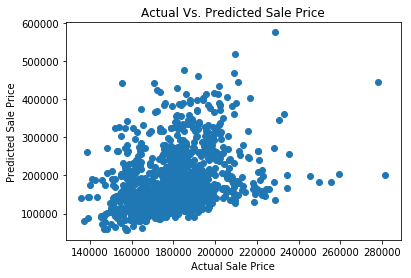

In [40]:
# Random Forest 

x_train = df_train.drop('SalePrice', axis=1)
x_test = df_test.drop('SalePrice', axis=1)

y_train = df_train['SalePrice']
y_test = df_test['SalePrice']

print("x_train Shape : {}".format(x_train.shape))
print("y_train Shape : {}".format(y_train.shape))
print("x_test Shape : {}".format(x_test.shape))
print("y_test Shape : {}".format(y_test.shape))

from sklearn.ensemble import RandomForestRegressor

# Create a model
model_rf = RandomForestRegressor()
result_rf = model_rf.fit(x_train,y_train)

print("Regressor Score : {}".format(model_rf.score(x_test, y_test)))

# Predict The Model
y_predicted = result_rf.predict(x_test)

# Measure the mean square error 
print('\n')
mse_error_rf = np.mean((y_predicted - y_test) ** 2)
print("Mean Square Error : {}".format(mse_error_rf))

#Test Scores
print('\n')
print("Test Scores :\n")
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr

test_score = r2_score(y_test, y_predicted)
spearman = spearmanr(y_test, y_predicted)
pearson = pearsonr(y_test, y_predicted)

print('Test Data R-2 Score: {}'.format(test_score))
print('Test Data Spearman Correlation: {}.'.format(spearman))
print('Test Data Pearson Correlation: {}'.format(pearson))

print('\n')

# Plot Predicted Vs. Actual Values
plt.scatter(y_test, y_predicted)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual Vs. Predicted Sale Price")
plt.show()

x_train Shape : (1385, 14)
y_train Shape : (1385,)
x_test Shape : (1364, 14)
y_test Shape : (1364,)
Model Intercept

LotArea              0.513532
OverallQual      17870.333599
OverallCond       6097.154510
YearBuilt          346.812260
TotalBsmtSF         19.509268
FirstFlrSF          58.118733
SecondFlrSF         50.435459
BedroomAbvGr    -12122.179331
KitchenAbvGr    -23725.772777
TotRmsAbvGrd      5270.506138
GarageCars       13062.520569
MSZoning_RH    -752473.783219
MSZoning_RL    -752593.293941
MSZoning_RM    -765177.727560
dtype: float64


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     399.8
Date:                Fri, 14 Dec 2018   Prob (F-statistic):               0.00
Time:                        04:49:12   Log-Likelih

Text(0.5,0,'Actual Sale Price')

Text(0,0.5,'Predicted Sale Price')

Text(0.5,1,'Actual Vs. Predicted Sale Price')

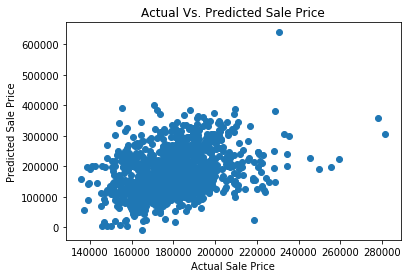

In [41]:
# Logitic Regression

# Selecting Features
x_train = df_train.drop(['SalePrice','FullBath','HalfBath','GarageArea','GrLivArea'], axis=1)
x_test = df_test.drop(['SalePrice','FullBath','HalfBath','GarageArea','GrLivArea'], axis=1)

y_train = df_train['SalePrice']
y_test = df_test['SalePrice']

print("x_train Shape : {}".format(x_train.shape))
print("y_train Shape : {}".format(y_train.shape))
print("x_test Shape : {}".format(x_test.shape))
print("y_test Shape : {}".format(y_test.shape))


# Train The Model
model = sm.OLS(y_train, x_train)
result = model.fit()

# Model Intercept
print('Model Intercept\n')
print(result.params)
print('\n')

# Summary Of The Model
print(result.summary())

# Predict The Model
y_predicted = result.predict(x_test)

print('\n')

# Measure the mean square error 
mse_error = np.mean((y_predicted - y_test) ** 2)
# (c) Print the mean squared error
print("Mean Square Error : {}".format(mse_error)) 

test_score = r2_score(y_test, y_predicted)
spearman = spearmanr(y_test, y_predicted)
pearson = pearsonr(y_test, y_predicted)

print('Test Data R-2 Score: {}'.format(test_score))
print('Test Data Spearman Correlation: {}.'.format(spearman))
print('Test Data Pearson Correlation: {}'.format(pearson))

# Plot Predicted Vs. Actual Values
plt.scatter(y_test, y_predicted)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual Vs. Predicted Sale Price")



# SELF FUNCTION TESTING

The GraphFunction consists of a function 'graph_function' which is used to display the list of features in a datset which is provided by the user. The user can then choose the features. This function will return a simple counts graph (histogram) for all the features selected by the user.

In [47]:
import AjGraphFunction as agf

['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'TotalBsmtSF', 'FirstFlrSF', 'SecondFlrSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM']

If done with selecting features, enter NA

Choose the feature you want : YearBuilt
Choose the feature you want : SalePrice
Choose the feature you want : OverallQual
Choose the feature you want : OverallCond
Choose the feature you want : NA
['YearBuilt', 'SalePrice', 'OverallQual', 'OverallCond']

Enter a title for the graphs : Housing Dataset


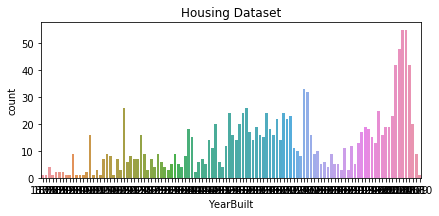

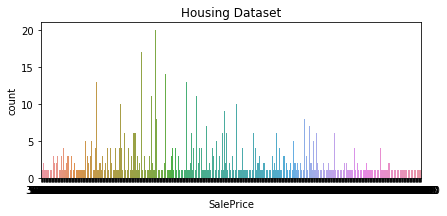

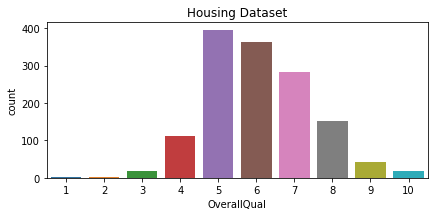

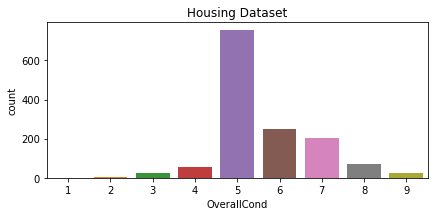

In [48]:
agf.graph_function(df_train)